# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:\\Education\\7bits\\courses\\MLandDS\\ml-solutions\\ml_course\\data\\house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
assert df.shape == (1460, 80)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [5]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis

e:\программы для учебы\python 3.8.1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


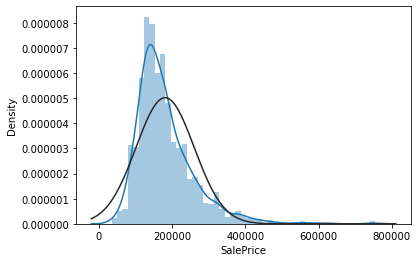

In [6]:
sns.distplot(df['SalePrice'], fit=norm)

In [7]:
kurtosis(df['SalePrice'], fisher=True)

6.509812011089439

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

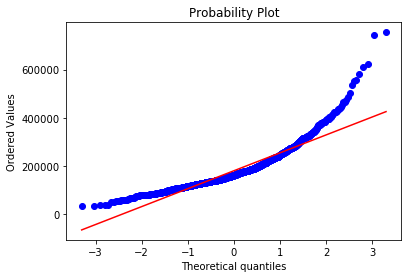

In [8]:
stats.probplot(df['SalePrice'], plot=plt)

График нормальной вероятности выборки из распределения со смещением вправо - он имеет форму перевернутой C. Гистограмма выборки из нормального распределения - выглядит довольно симметричной и одномодальной, однако есть все же небольшое смещение вправо.

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

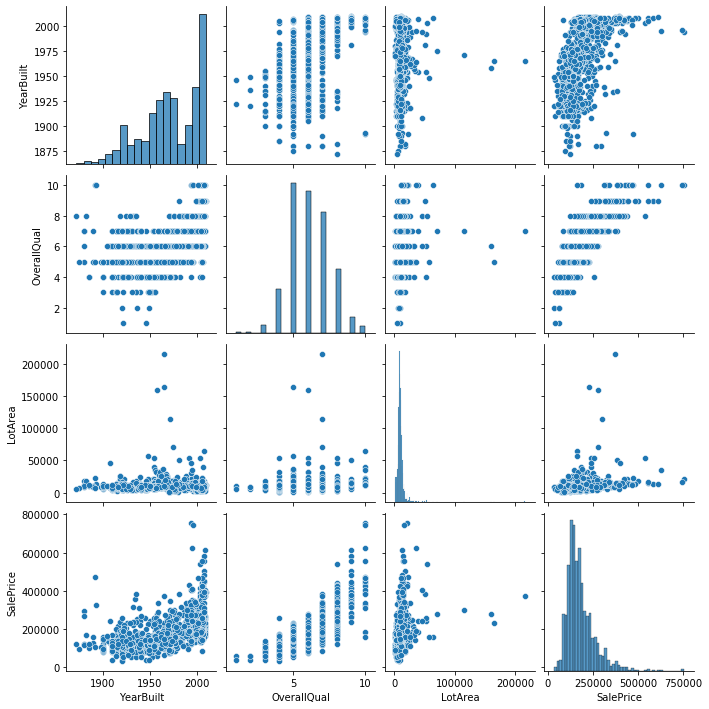

In [9]:
cols = ['YearBuilt', 'OverallQual', 'LotArea', 'SalePrice']
sns.pairplot(df[cols])

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

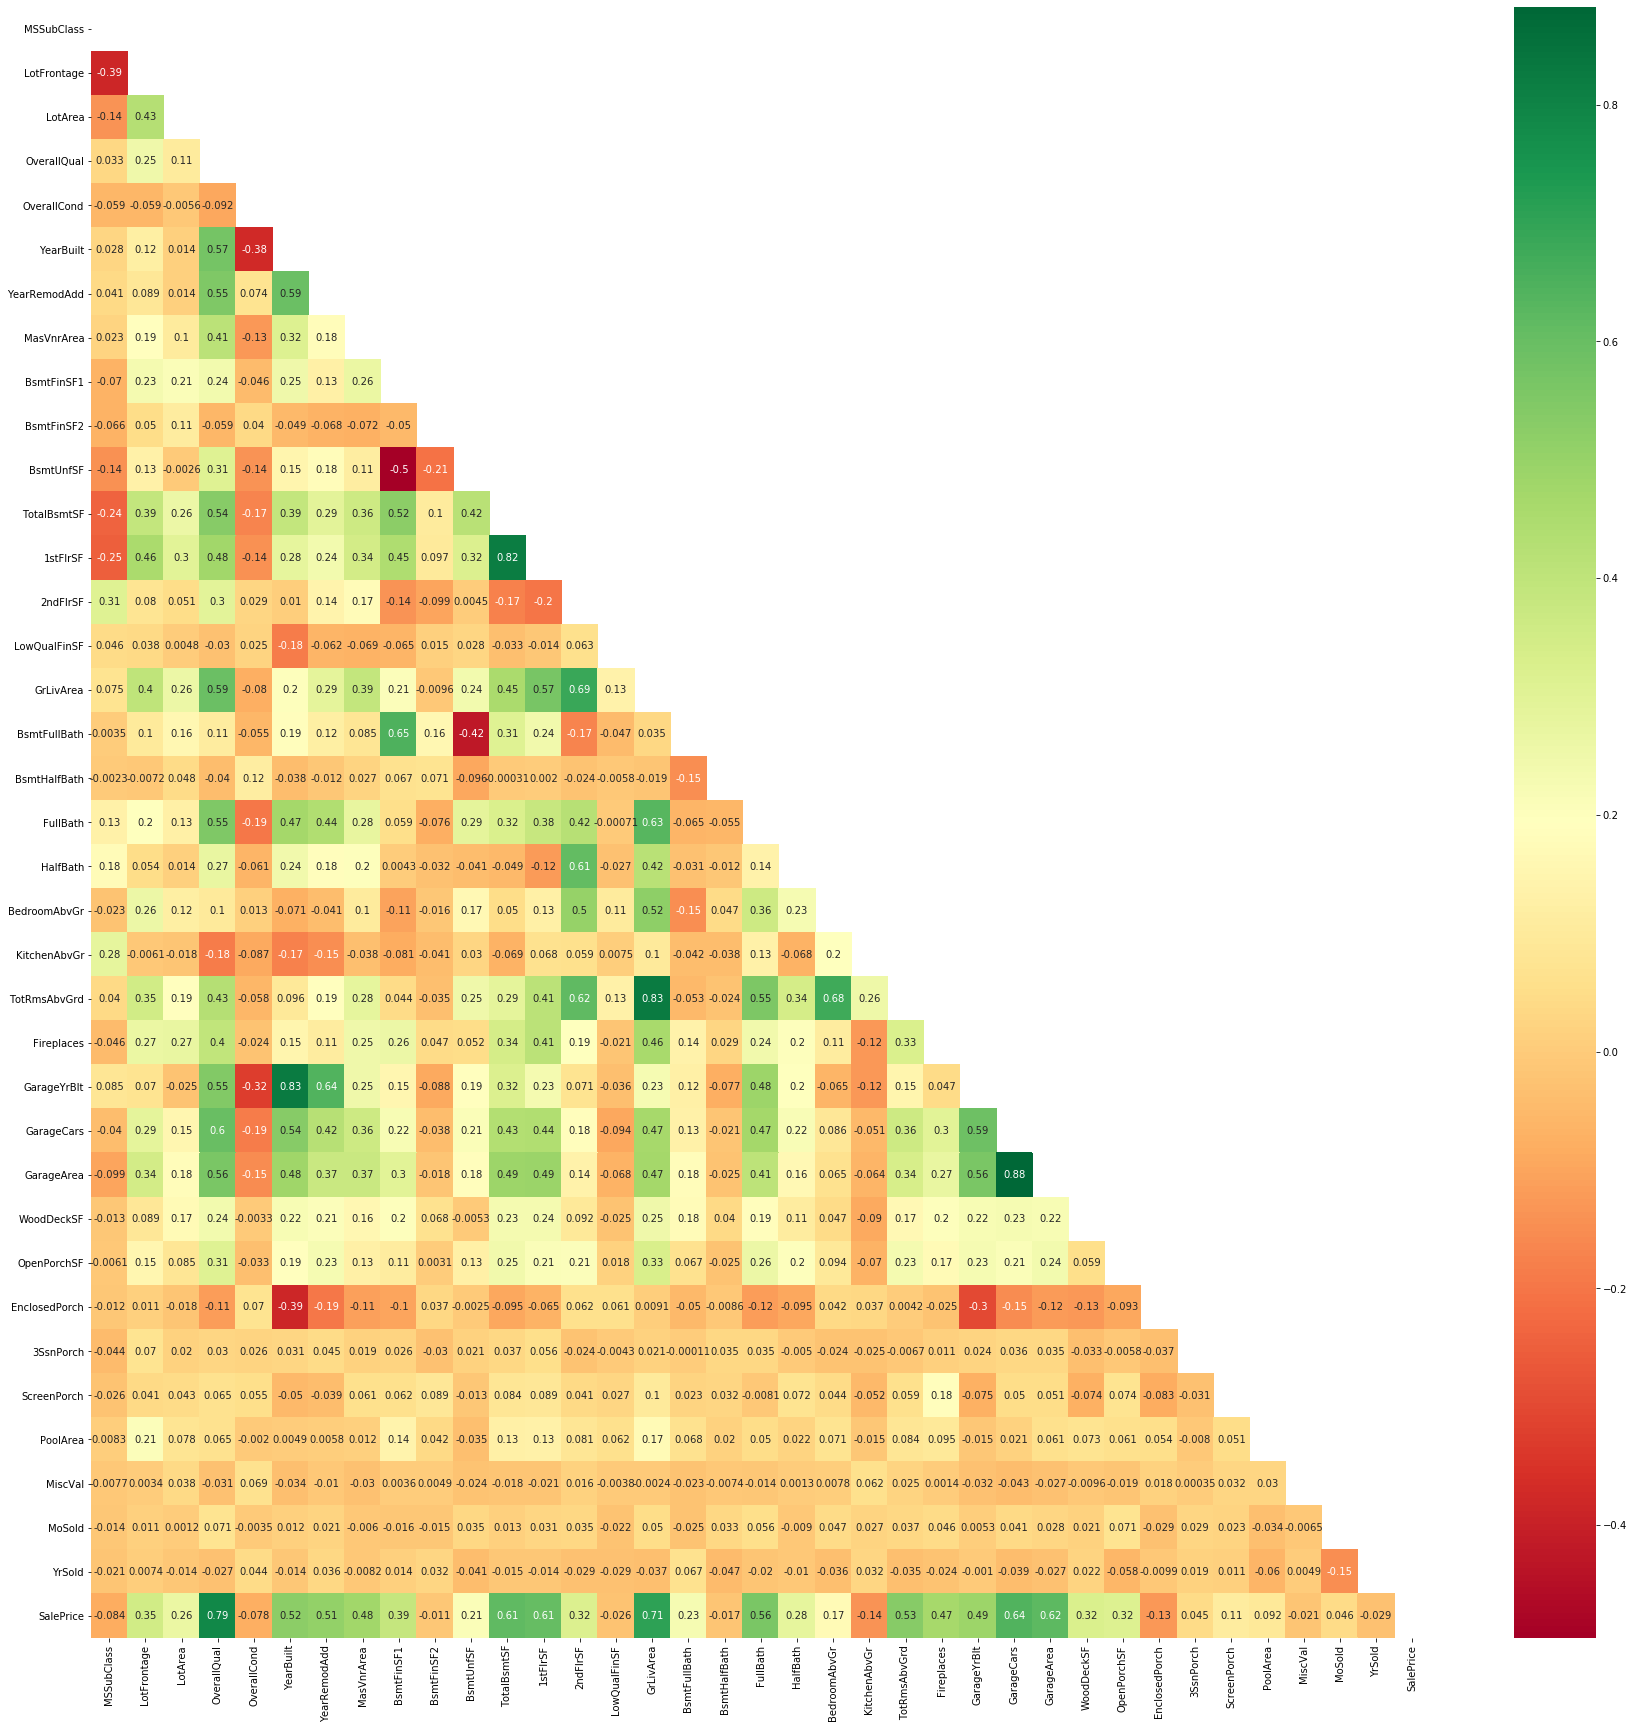

In [10]:
plt.figure(figsize=(30, 30))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', mask = matrix)

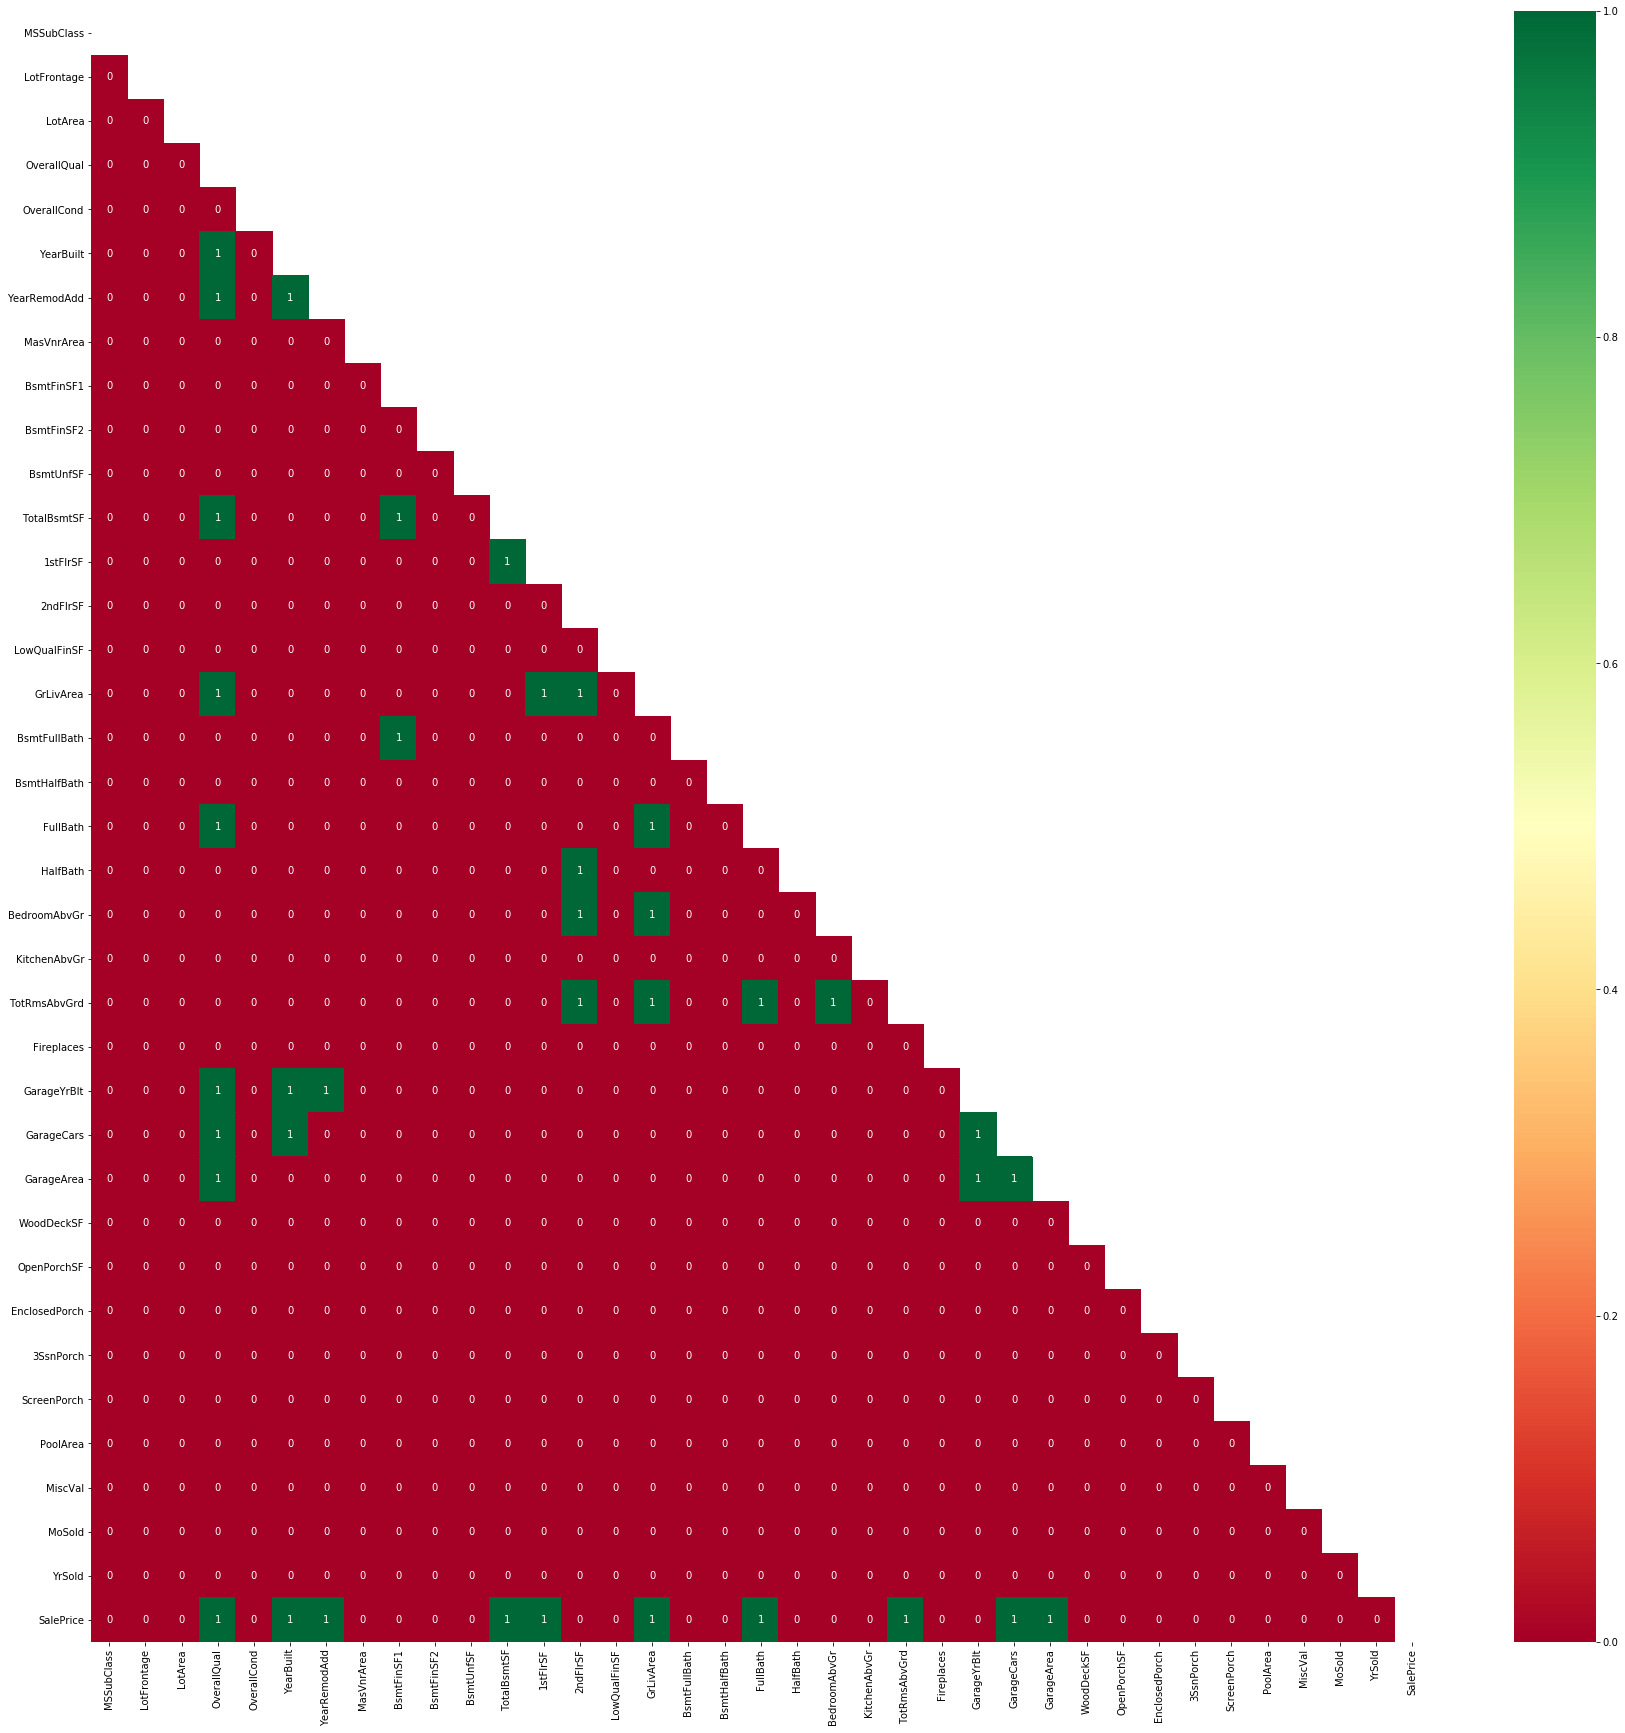

In [11]:
plt.figure(figsize=(30, 30))
matrix = np.triu(df.corr())
sns.heatmap(df.corr().abs() > 0.5, annot=True, cmap = 'RdYlGn', mask = matrix)

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

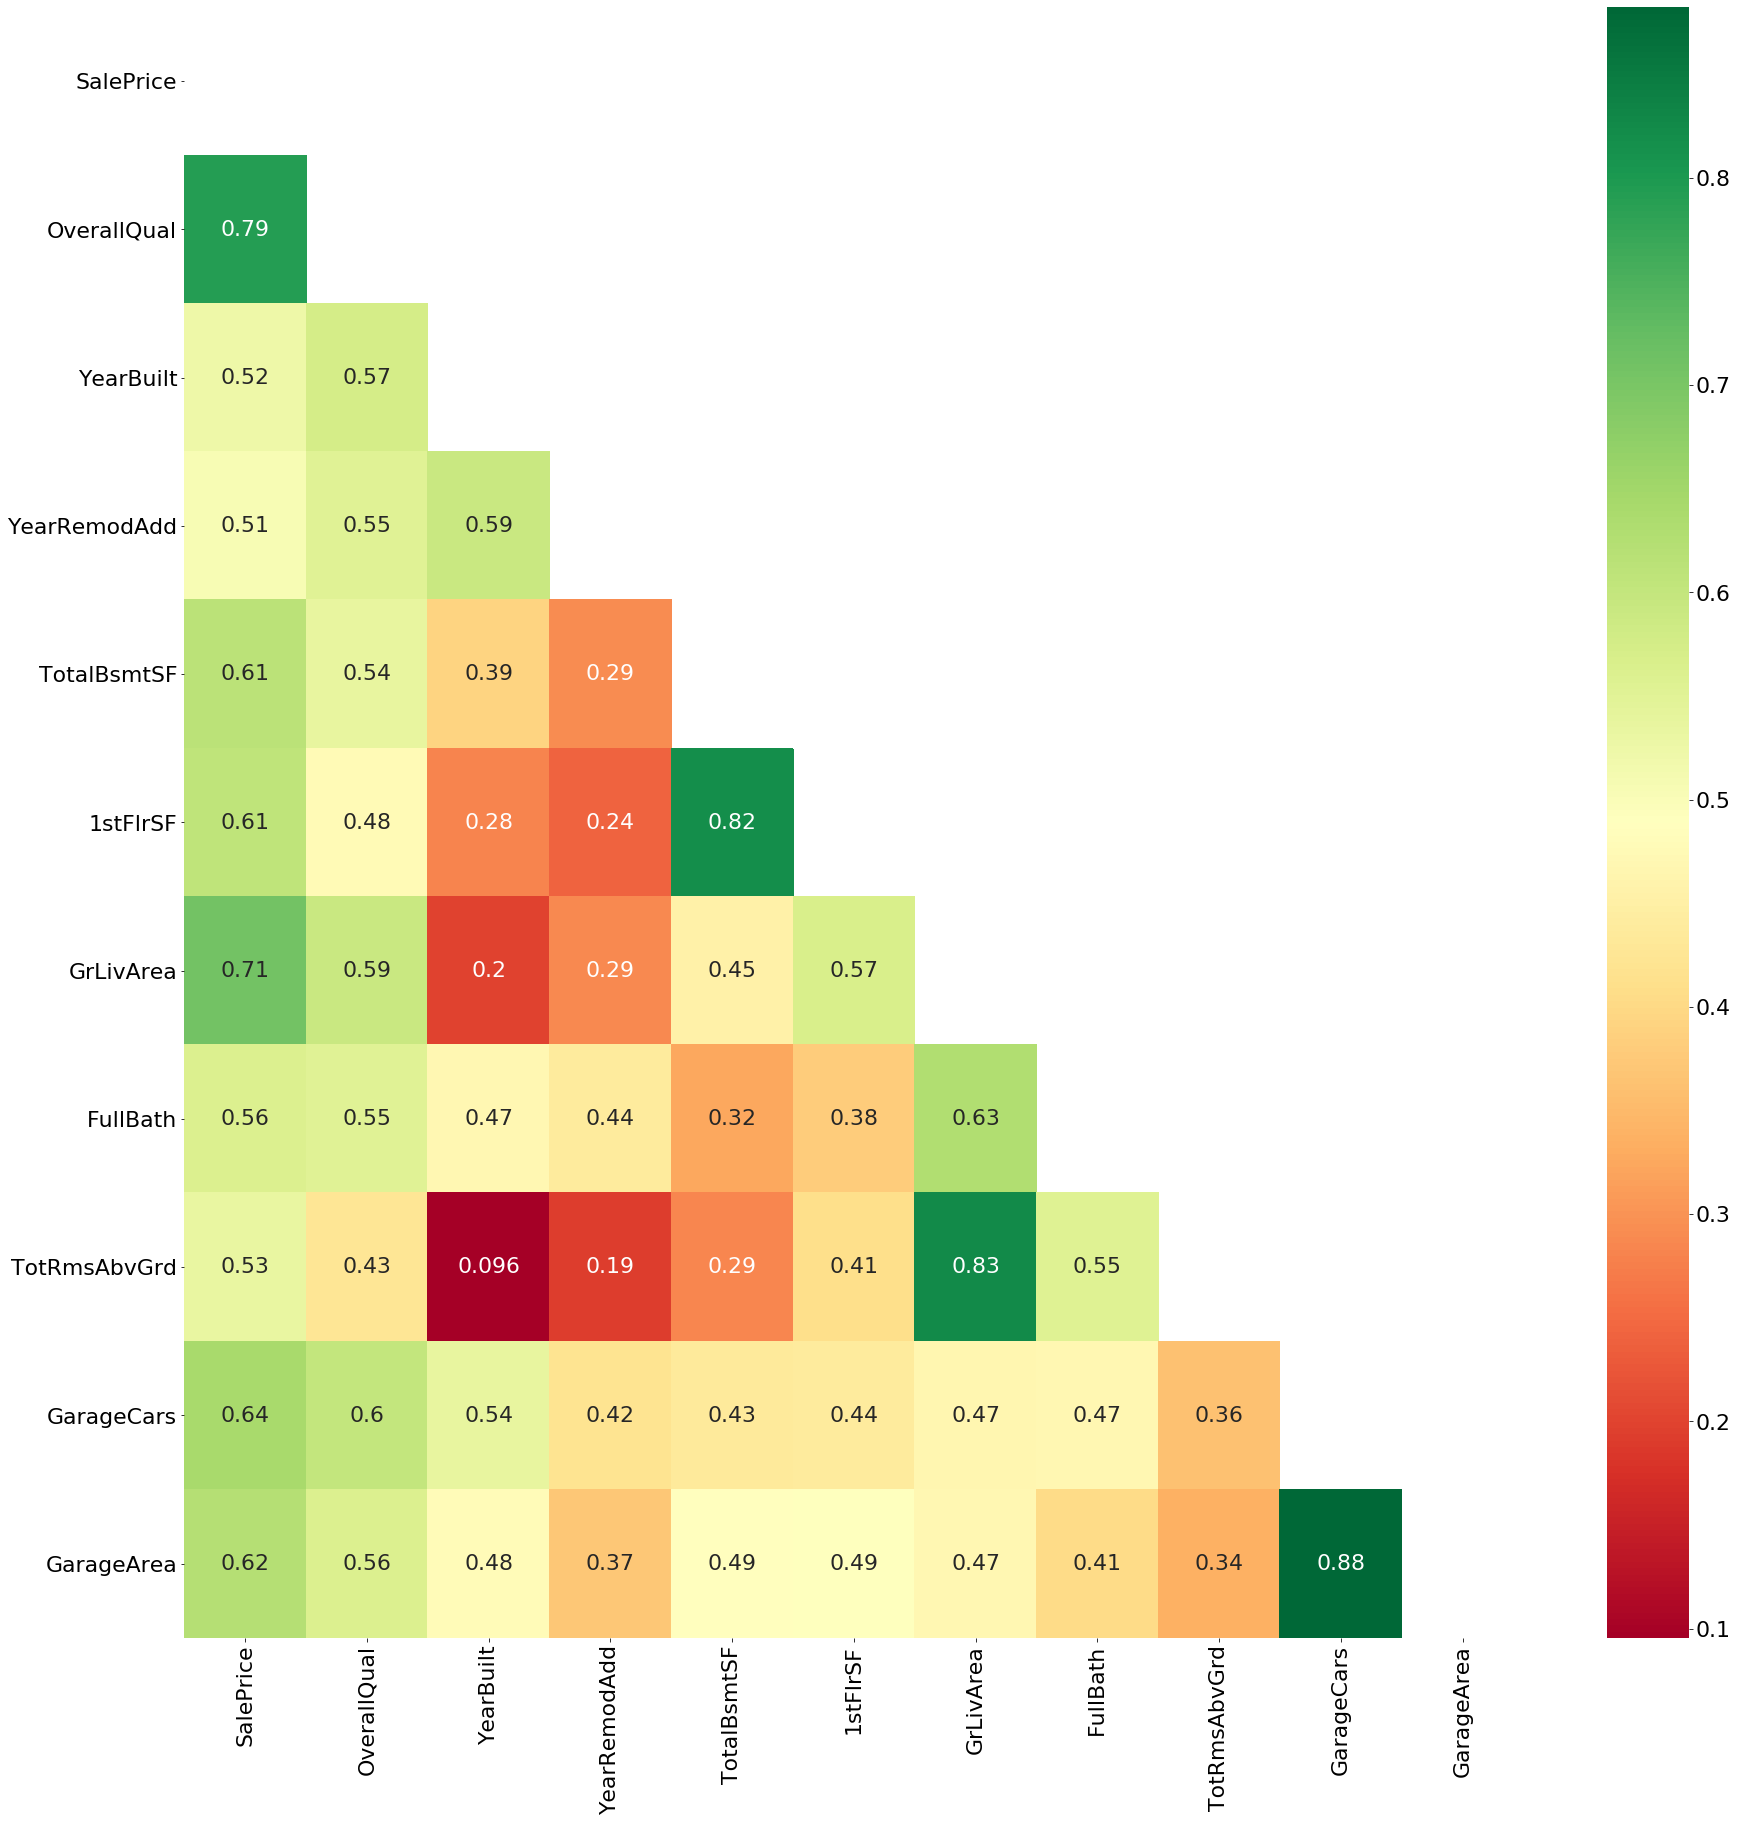

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

selected_columns = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
        'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

plt.figure(figsize=(30, 30))
new_df = df[selected_columns]
matrix = np.triu(new_df.corr())

corr = new_df.corr().abs()      


sns.heatmap(corr, cmap="RdYlGn", annot=True, mask = matrix)

In [13]:
df[selected_columns]

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
Id,,,,,,,,,,,
1,208500,7,2003,2003,856,856,1710,2,8,2,548
2,181500,6,1976,1976,1262,1262,1262,2,6,2,460
3,223500,7,2001,2002,920,920,1786,2,6,2,608
4,140000,7,1915,1970,756,961,1717,1,7,3,642
5,250000,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...,...
1456,175000,6,1999,2000,953,953,1647,2,7,2,460
1457,210000,6,1978,1988,1542,2073,2073,2,7,2,500
1458,266500,7,1941,2006,1152,1188,2340,2,9,1,252


In [14]:
selected_columns

['SalePrice',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

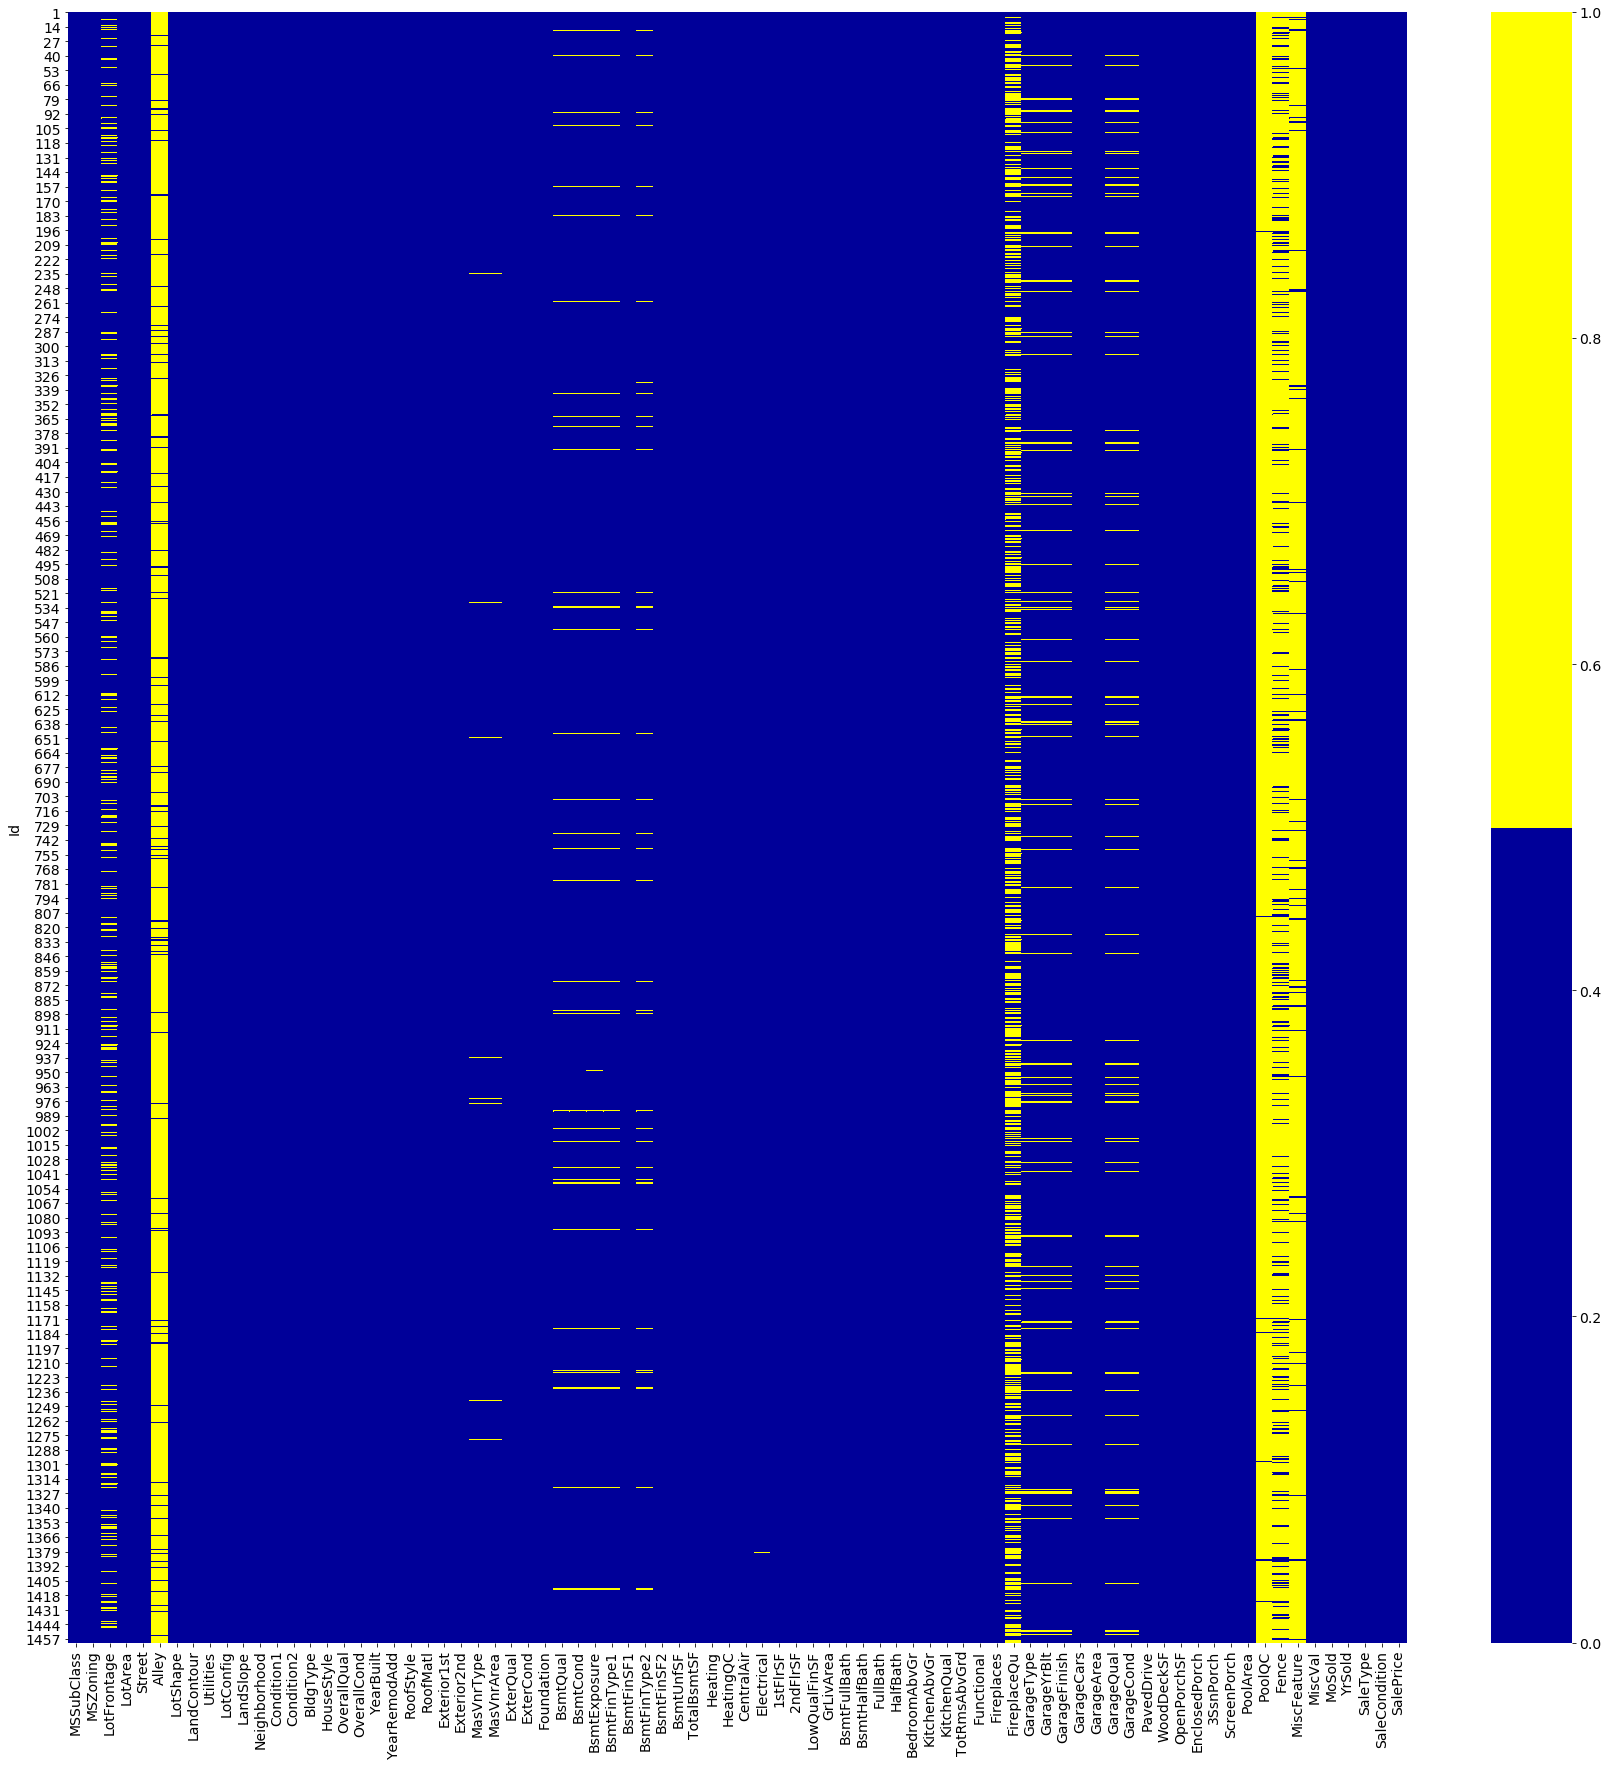

In [15]:
plt.figure(figsize=(30, 30))
plt.rcParams.update({'font.size': 14})
cols = df.columns 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [16]:
m = dict()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    m[col] = round(pct_missing*100)

MSSubClass - 0.0%
MSZoning - 0.0%
LotFrontage - 18.0%
LotArea - 0.0%
Street - 0.0%
Alley - 94.0%
LotShape - 0.0%
LandContour - 0.0%
Utilities - 0.0%
LotConfig - 0.0%
LandSlope - 0.0%
Neighborhood - 0.0%
Condition1 - 0.0%
Condition2 - 0.0%
BldgType - 0.0%
HouseStyle - 0.0%
OverallQual - 0.0%
OverallCond - 0.0%
YearBuilt - 0.0%
YearRemodAdd - 0.0%
RoofStyle - 0.0%
RoofMatl - 0.0%
Exterior1st - 0.0%
Exterior2nd - 0.0%
MasVnrType - 1.0%
MasVnrArea - 1.0%
ExterQual - 0.0%
ExterCond - 0.0%
Foundation - 0.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinSF1 - 0.0%
BsmtFinType2 - 3.0%
BsmtFinSF2 - 0.0%
BsmtUnfSF - 0.0%
TotalBsmtSF - 0.0%
Heating - 0.0%
HeatingQC - 0.0%
CentralAir - 0.0%
Electrical - 0.0%
1stFlrSF - 0.0%
2ndFlrSF - 0.0%
LowQualFinSF - 0.0%
GrLivArea - 0.0%
BsmtFullBath - 0.0%
BsmtHalfBath - 0.0%
FullBath - 0.0%
HalfBath - 0.0%
BedroomAbvGr - 0.0%
KitchenAbvGr - 0.0%
KitchenQual - 0.0%
TotRmsAbvGrd - 0.0%
Functional - 0.0%
Fireplaces - 0.0%
Firep

In [17]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
m

{'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 18.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 94.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 1.0,
 'MasVnrArea': 1.0,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 3.0,
 'BsmtCond': 3.0,
 'BsmtExposure': 3.0,
 'BsmtFinType1': 3.0,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 3.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': 0.0

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<Figure size 2160x2160 with 0 Axes>

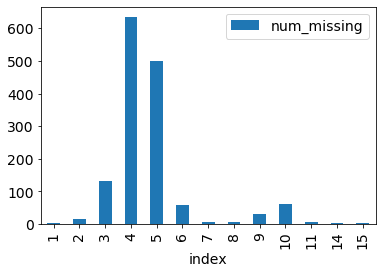

In [19]:
plt.figure(figsize=(30, 30))
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [20]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,PoolQC_ismissing,Fence_ismissing,MiscFeature_ismissing,num_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,True,False,False,False,False,False,True,True,True,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,False,True,True,True,4
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,True,True,4
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,True,True,True,4
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,True,True,4
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,True,3
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,False,2


In [21]:
for col in m:
    if m[col] > 10:
        del df[col]
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,PoolQC_ismissing,Fence_ismissing,MiscFeature_ismissing,num_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,True,False,False,False,False,False,True,True,True,5
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,False,False,False,False,False,False,True,True,True,4
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,False,False,False,False,False,False,True,True,True,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,False,False,False,False,False,False,True,True,True,4
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,False,False,False,False,False,False,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,False,False,False,False,False,False,True,True,True,4
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,False,False,False,False,False,False,True,False,True,3
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,False,False,False,False,False,False,True,False,False,2


In [22]:
df['MasVnrType']

Id
1       BrkFace
2          None
3       BrkFace
4          None
5       BrkFace
         ...   
1456       None
1457      Stone
1458       None
1459       None
1460       None
Name: MasVnrType, Length: 1460, dtype: object

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df.loc[df[col].isnull(), col]='unknown'

In [24]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df.loc[df[col].isnull(), col] = df[col].mean()

In [25]:
del df['num_missing']
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Electrical_ismissing,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,PoolQC_ismissing,Fence_ismissing,MiscFeature_ismissing
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,False,True,False,False,False,False,False,True,True,True
2,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,False,False,False,False,False,False,False,True,True,True
3,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,False,False,False,False,False,False,False,True,True,True
4,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,False,False,False,False,False,False,False,True,True,True
5,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,False,False,False,False,False,False,False,True,True,True
1457,20.0,RL,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,False,False,False,False,False,False,False,True,False,True
1458,70.0,RL,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,False,False,False,False,False,False,False,True,False,False


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [26]:
cat_features = list()
for col in df.columns:
    if df[col].dtype == 'object':
        cat_features.append(col)
df = pd.get_dummies(df, columns = cat_features)

In [27]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1457,20.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,0,0,0,1,0,0,0,0,1,0
1458,70.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
df.shape[1]

300

In [29]:
X = np.array(df.drop(['SalePrice'], 1))
Y = np.array(df['SalePrice'])

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
for coef, col in sorted(zip(model.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

-0.2608 	 MiscVal
0.7482 	 LotArea
-2.0027 	 BsmtUnfSF
3.1444 	 OpenPorchSF
5.7275 	 EnclosedPorch
7.6882 	 BsmtFinSF2
13.4442 	 WoodDeckSF
15.2888 	 1stFlrSF
16.5889 	 BsmtFinSF1
-18.7293 	 LowQualFinSF
18.8173 	 GarageArea
18.894 	 MasVnrArea
22.2744 	 TotalBsmtSF
28.8388 	 ScreenPorch
-31.4184 	 GarageYrBlt
31.572 	 GrLivArea
-32.4699 	 MSSubClass
34.5442 	 3SsnPorch
35.0125 	 2ndFlrSF
-73.1674 	 LotFrontage_ismissing
89.4092 	 Electrical_FuseF
103.9658 	 GarageFinish_RFn
103.9667 	 YearRemodAdd
113.0661 	 BsmtFinType1_ALQ
167.8167 	 GarageType_Basment
-190.5925 	 LotShape_Reg
197.3196 	 PoolArea
231.3953 	 CentralAir_N
-231.3953 	 HeatingQC_TA
-235.0511 	 Exterior2nd_ImStucc
-250.511 	 Exterior2nd_Wd Sdng
319.6025 	 YearBuilt
339.1247 	 Heating_GasW
-365.2474 	 Exterior1st_CBlock
-374.2123 	 MasVnrType_BrkCmn
-398.2527 	 Functional_Min2
-400.001 	 BsmtFinType2_LwQ
-416.9527 	 BsmtHalfBath
-429.7079 	 MoSold
-445.6581 	 YrSold
465.3185 	 BsmtCond_unknown
542.7067 	 GarageType_unknow

In [33]:
from sklearn.model_selection import cross_val_score
cv = 3 # проведем 3 эксперимента
errors = cross_val_score(LinearRegression(), X, Y, cv=cv, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-3.91935241e+08 -1.89221295e+04 -1.68594056e+08]
error=186849406.254, std=160519040.6174


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

-0.4746 	 MiscVal
0.521 	 LotArea
0.6247 	 OpenPorchSF
-1.9485 	 BsmtUnfSF
2.9135 	 GarageArea
4.5955 	 BsmtFinSF2
5.1834 	 BsmtFinSF1
7.8305 	 TotalBsmtSF
-8.2996 	 LowQualFinSF
9.627 	 EnclosedPorch
11.8502 	 1stFlrSF
16.3874 	 WoodDeckSF
16.6753 	 ExterCond_Ex
16.8263 	 MasVnrArea
29.6596 	 2ndFlrSF
30.0643 	 Exterior1st_MetalSd
33.2102 	 GrLivArea
39.9337 	 ScreenPorch
-40.5513 	 GarageYrBlt
40.6642 	 3SsnPorch
-75.6118 	 GarageFinish_RFn
-81.8054 	 MSSubClass
82.9146 	 YearRemodAdd
102.4565 	 PoolArea
-105.0689 	 BsmtFinType1_LwQ
-113.1901 	 Exterior2nd_Other
115.7375 	 PoolQC_ismissing
121.8904 	 GarageCond_Gd
-127.2548 	 SaleType_New
135.5235 	 Electrical_FuseA
171.1741 	 Electrical_FuseP
-178.0711 	 Heating_GasW
-203.7533 	 GarageCond_unknown
205.554 	 YearBuilt
-219.8627 	 BsmtCond_unknown
-284.7016 	 HeatingQC_TA
284.7016 	 CentralAir_N
353.72 	 BsmtFinType2_Rec
-370.9173 	 HeatingQC_Po
-375.4564 	 GarageType_Basment
-393.1517 	 MoSold
406.289 	 Fence_ismissing
-454.9918 	 Ma

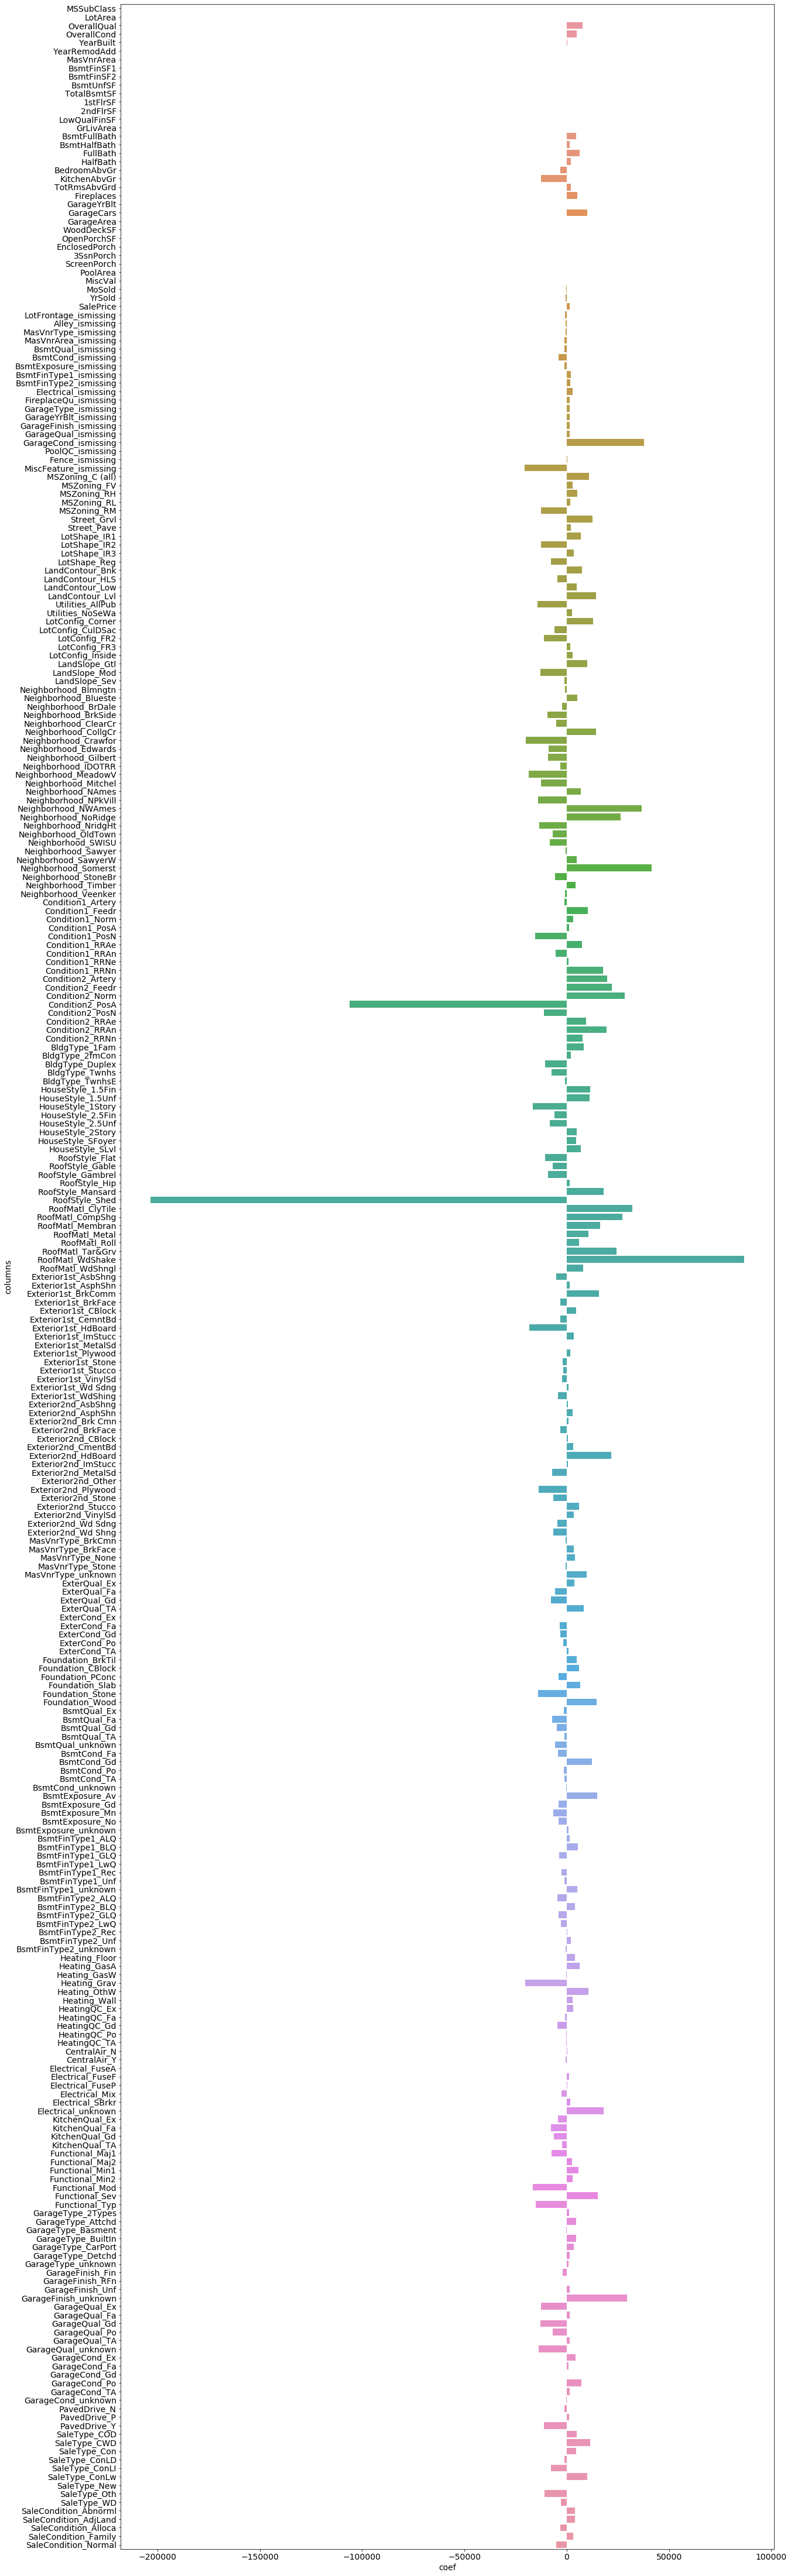

In [34]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge()
ridge.fit(X, Y)

for coef, col in sorted(zip(ridge.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
# Магнитуда признаков
plt.figure(figsize=(20,80))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.coef_, df.columns)), columns=["coef", "columns"]))
pass

e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145774943482.5609, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(


0.0 	 BsmtQual_ismissing
0.0 	 MSZoning_FV
-0.0 	 Utilities_AllPub
0.0 	 LotConfig_FR3
0.0 	 LotConfig_Inside
-0.0 	 Neighborhood_IDOTRR
0.0 	 Condition1_RRNe
-0.0 	 Condition2_Feedr
-0.0 	 BldgType_2fmCon
0.0 	 Exterior1st_CBlock
0.0 	 Exterior2nd_Stone
-0.0 	 MasVnrType_BrkCmn
-0.0 	 ExterCond_Ex
0.0 	 BsmtQual_Ex
0.0 	 BsmtCond_Po
-0.0 	 BsmtExposure_Gd
-0.0 	 BsmtFinType1_ALQ
0.0 	 BsmtFinType2_LwQ
0.0 	 HeatingQC_Ex
0.0 	 KitchenQual_TA
-0.0 	 GarageType_CarPort
-0.0 	 GarageCond_unknown
-0.0 	 SaleType_New
0.0 	 GarageFinish_ismissing
0.0 	 GarageYrBlt_ismissing
0.0 	 GarageQual_ismissing
0.0 	 CentralAir_N
0.0 	 GarageType_ismissing
-0.0 	 MasVnrType_ismissing
0.0 	 Street_Grvl
-0.0235 	 GarageQual_Po
0.0264 	 GarageQual_TA
0.0287 	 GarageCond_TA
-0.3094 	 MiscVal
0.7178 	 GarageFinish_Unf
0.7336 	 LotArea
-1.0604 	 GarageFinish_RFn
3.6226 	 OpenPorchSF
5.3726 	 LowQualFinSF
5.5629 	 RoofMatl_Roll
5.5778 	 EnclosedPorch
7.2838 	 GrLivArea
7.6202 	 TotalBsmtSF
-10.2445 	 Electric

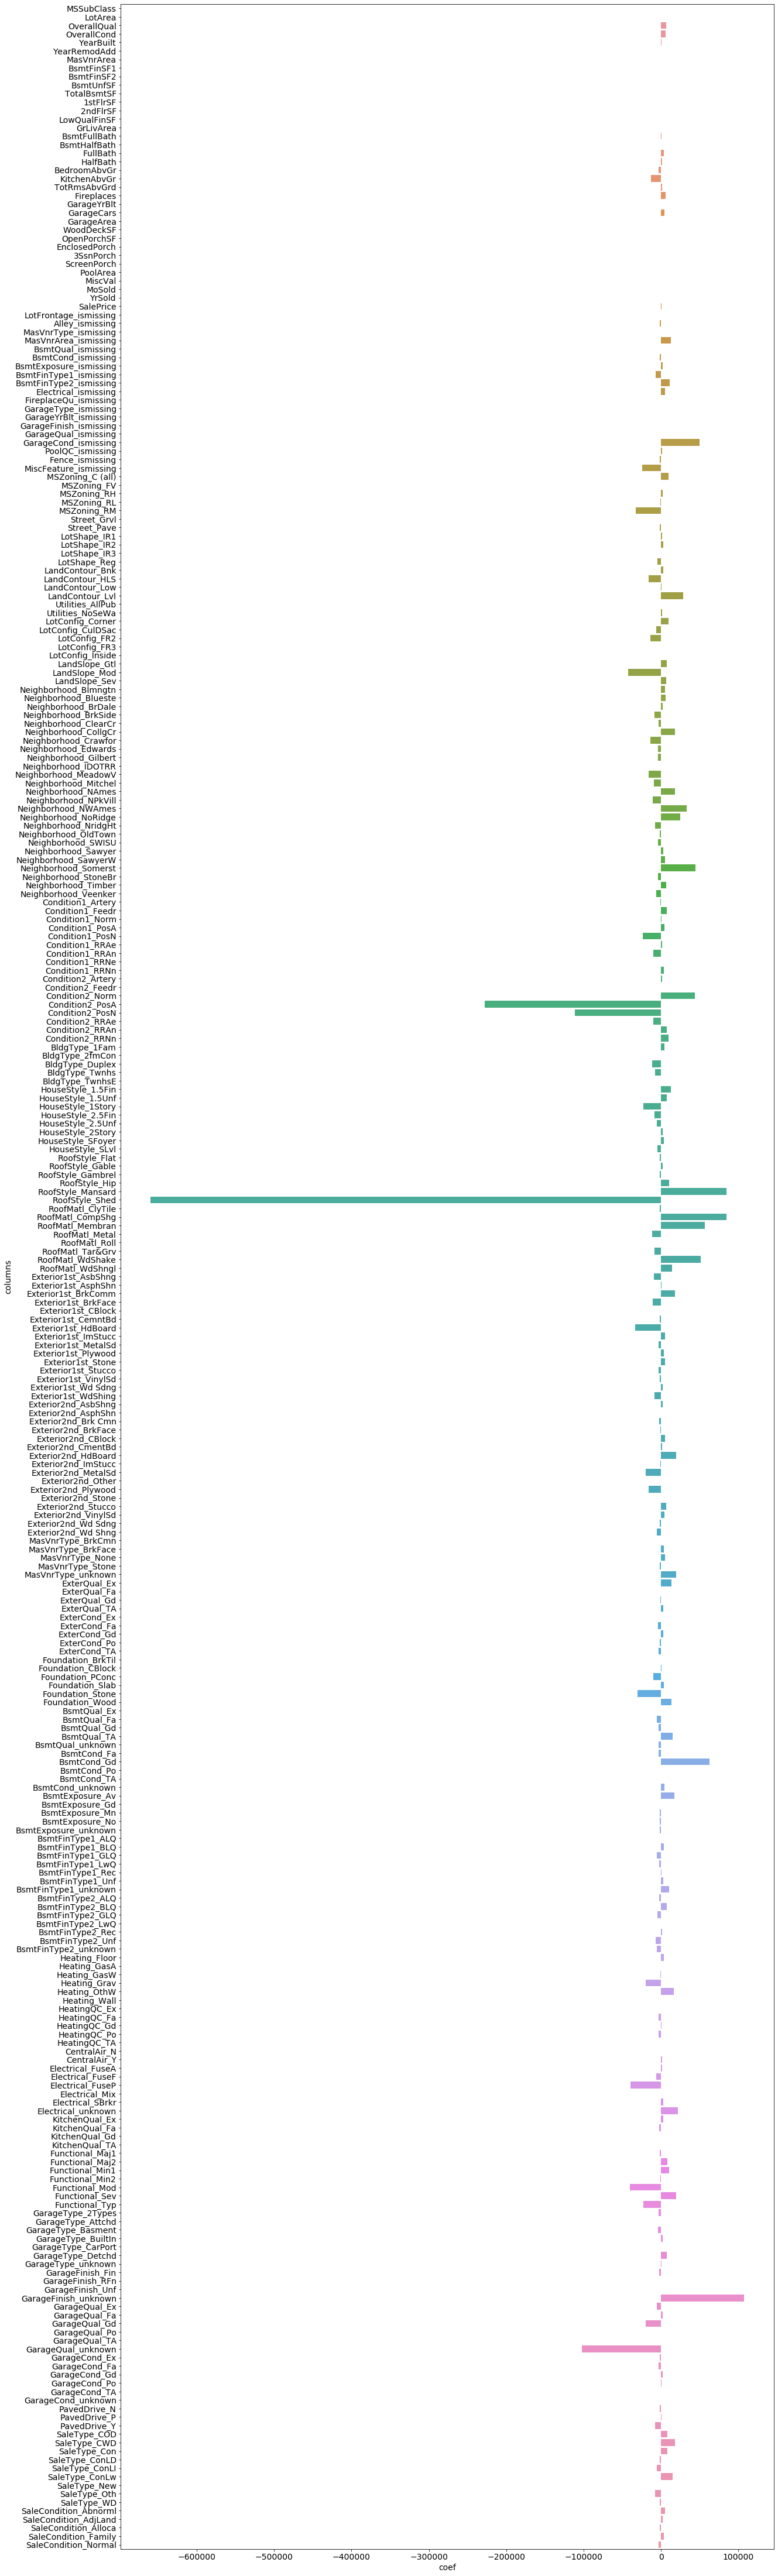

In [35]:
lasso = Lasso()
lasso.fit(X, Y)

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
plt.figure(figsize=(20,80))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lasso.coef_, df.columns)), columns=["coef", "columns"]))
pass

In [36]:
d = dict()
for i in range(0, 500, 1):
    lasso = Lasso(alpha = float(i))
    lasso.fit(X, Y)
    
    count = 0
    for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
        if abs(np.round(coef, 4)) < 0.0001:
            count += 1
    
    d[i] = count

<ipython-input-36-903ddad8f274>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, Y)
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316815059430.072, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145774943482.5609, tolerance: 920791133.4609975
  m

In [37]:
d

{0: 9,
 1: 30,
 2: 37,
 3: 45,
 4: 48,
 5: 57,
 6: 62,
 7: 66,
 8: 68,
 9: 67,
 10: 75,
 11: 78,
 12: 82,
 13: 88,
 14: 90,
 15: 92,
 16: 94,
 17: 94,
 18: 98,
 19: 102,
 20: 103,
 21: 110,
 22: 112,
 23: 114,
 24: 118,
 25: 119,
 26: 124,
 27: 124,
 28: 124,
 29: 124,
 30: 127,
 31: 130,
 32: 132,
 33: 133,
 34: 133,
 35: 136,
 36: 139,
 37: 139,
 38: 139,
 39: 140,
 40: 142,
 41: 143,
 42: 144,
 43: 146,
 44: 147,
 45: 147,
 46: 149,
 47: 151,
 48: 153,
 49: 152,
 50: 152,
 51: 153,
 52: 153,
 53: 154,
 54: 155,
 55: 156,
 56: 157,
 57: 158,
 58: 158,
 59: 158,
 60: 159,
 61: 159,
 62: 160,
 63: 161,
 64: 161,
 65: 162,
 66: 162,
 67: 164,
 68: 163,
 69: 163,
 70: 163,
 71: 163,
 72: 167,
 73: 168,
 74: 168,
 75: 167,
 76: 169,
 77: 167,
 78: 171,
 79: 171,
 80: 172,
 81: 172,
 82: 172,
 83: 173,
 84: 173,
 85: 173,
 86: 175,
 87: 175,
 88: 176,
 89: 176,
 90: 176,
 91: 176,
 92: 177,
 93: 178,
 94: 180,
 95: 180,
 96: 180,
 97: 181,
 98: 183,
 99: 184,
 100: 185,
 101: 186,
 102: 18

<BarContainer object of 500 artists>

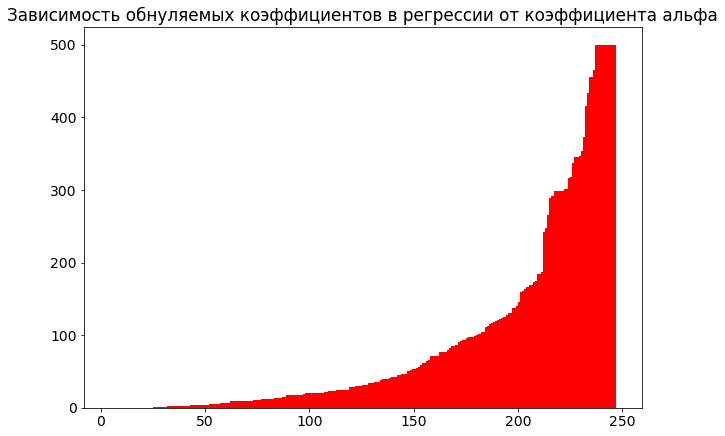

In [38]:
plt.figure(figsize=[10, 7])
plt.title('Зависимость обнуляемых коэффициентов в регрессии от коэффициента альфа')
plt.bar(d.values(), d.keys(), width=10, color='red')

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878249304.7695312, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352539985.6795654, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1405501150.5845947, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklea

e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4098304778.3685913, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4452102107.011108, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4794501092.079956, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklear

e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1630189239.756836, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1253216766.5721436, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1999852890.7529297, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent_gram(
e:\программы для учебы\python 3.8.1\lib\site-packages\sklea

alpha = 145.29999999999998


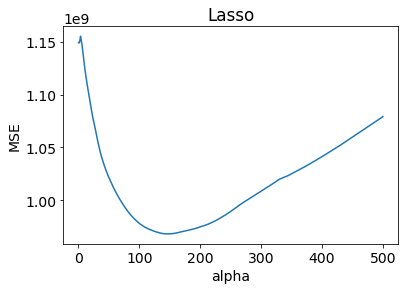

In [39]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.1, 500, 5000)
lasso_cv = LassoCV(cv=5, alphas = alphas, random_state=42)
lasso_cv.fit(X, Y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

In [40]:
lasso = Lasso(alpha = 145.299)
lasso.fit(X, Y)

coefs = dict()

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    if abs(np.round(coef, 4)) > 0.0001:
            coefs[col] = coef

-0.0 	 BsmtHalfBath
0.0 	 HalfBath
-0.0 	 SalePrice
0.0 	 LotFrontage_ismissing
-0.0 	 Alley_ismissing
-0.0 	 MasVnrType_ismissing
-0.0 	 MasVnrArea_ismissing
-0.0 	 BsmtQual_ismissing
-0.0 	 BsmtCond_ismissing
-0.0 	 BsmtExposure_ismissing
0.0 	 BsmtFinType1_ismissing
0.0 	 BsmtFinType2_ismissing
0.0 	 Electrical_ismissing
0.0 	 GarageCond_ismissing
0.0 	 PoolQC_ismissing
0.0 	 Fence_ismissing
-0.0 	 MiscFeature_ismissing
0.0 	 MSZoning_C (all)
0.0 	 MSZoning_FV
-0.0 	 MSZoning_RM
0.0 	 Street_Grvl
-0.0 	 Street_Pave
-0.0 	 LotShape_IR2
0.0 	 LotShape_IR3
0.0 	 LandContour_Bnk
-0.0 	 LandContour_HLS
0.0 	 LandContour_Low
0.0 	 LandContour_Lvl
-0.0 	 Utilities_AllPub
0.0 	 Utilities_NoSeWa
-0.0 	 LotConfig_FR2
-0.0 	 LotConfig_FR3
-0.0 	 LotConfig_Inside
-0.0 	 LandSlope_Mod
-0.0 	 LandSlope_Sev
-0.0 	 Neighborhood_Blmngtn
0.0 	 Neighborhood_Blueste
-0.0 	 Neighborhood_BrkSide
-0.0 	 Neighborhood_ClearCr
-0.0 	 Neighborhood_Edwards
-0.0 	 Neighborhood_Gilbert
0.0 	 Neighborhood_IDOTRR


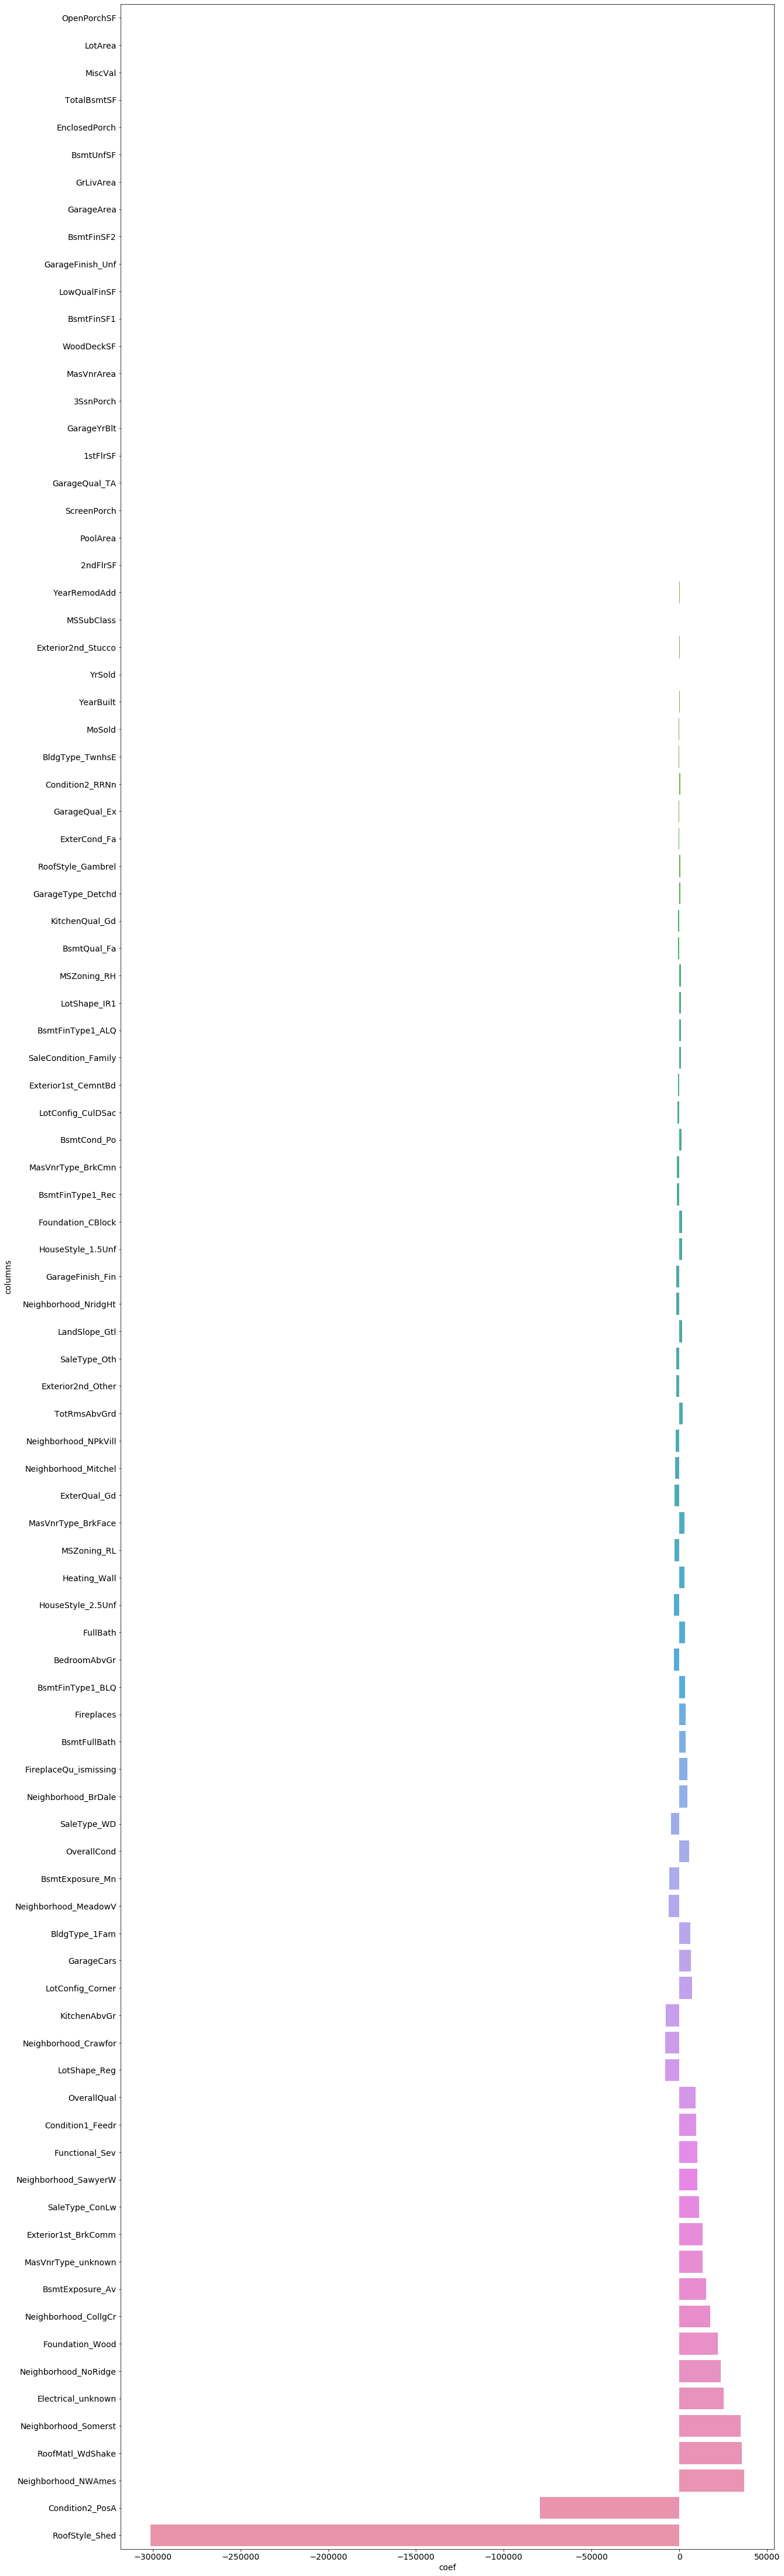

In [41]:
plt.figure(figsize=(20,80))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(coefs.values(), coefs.keys())), columns=["coef", "columns"]))
pass

In [42]:
len(coefs)

93

In [43]:
from sklearn.model_selection import cross_val_score

cv = 5
errors = cross_val_score(Lasso(lasso_cv.alpha_), X, Y, cv=cv, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-15576.67664869 -17139.41645536 -16733.98483271 -14568.37117861
 -18480.70792316]
error=16499.831, std=1339.4418


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=42)
print("train_shape={}, test_shape={}".format(X_train.shape, X_test.shape))

train_shape=(978, 299), test_shape=(482, 299)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [45]:
reg = Lasso(lasso_cv.alpha_)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

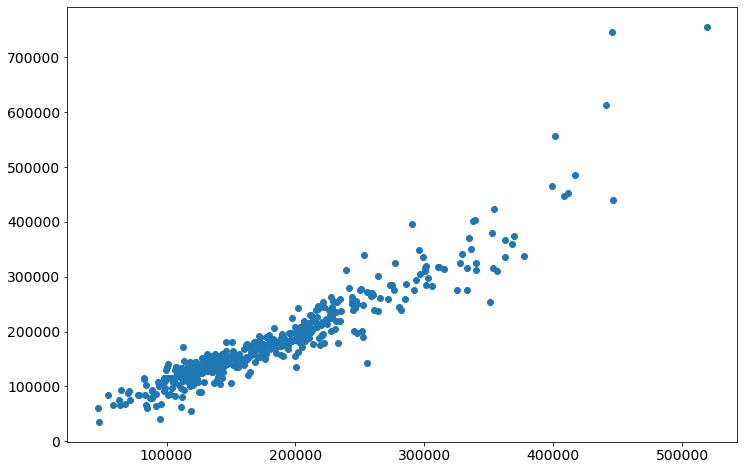

In [46]:
plt.figure(figsize=(12,8))

plt.scatter(pred, y_test)
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [47]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=300)

In [48]:
selected_columns

['SalePrice',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [49]:
df = df[selected_columns]
df

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
Id,,,,,,,,,,,
1,208500.0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0
2,181500.0,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0
3,223500.0,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0
4,140000.0,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0
5,250000.0,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
1456,175000.0,6.0,1999.0,2000.0,953.0,953.0,1647.0,2.0,7.0,2.0,460.0
1457,210000.0,6.0,1978.0,1988.0,1542.0,2073.0,2073.0,2.0,7.0,2.0,500.0
1458,266500.0,7.0,1941.0,2006.0,1152.0,1188.0,2340.0,2.0,9.0,1.0,252.0


In [50]:
X = np.array(df.drop(['SalePrice'], 1))
Y = np.array(df['SalePrice'])

In [51]:
from sklearn.model_selection import cross_val_score

cv = 5
errors = cross_val_score(Lasso(alpha = 1), X, Y, cv=cv, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-22738.43529706 -24041.70297119 -24880.91641715 -23482.45058712
 -26194.3435376 ]
error=24267.570, std=1191.1617


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.